In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import json
import io

In [14]:
def get_pc100(df):
    fig, ax1 = plt.subplots(figsize=(12,4))

    x_dates = df["dtime per month"]
    ax1.set_ylabel('Percentage (%)')
    ax1.set_xlabel('Year')
    ax1.plot(x_dates, df["Percentage <100ms"], label=f"Percentage <100ms", color = "green")
    ax1.tick_params(axis='y', labelcolor="green")

    ax2=ax1.twinx()
    ax2.set_ylabel('Average download speed (Mbps)')
    ax2.plot(x_dates, df["Average speed (Mbps)"], color = "blue")
    ax2.tick_params(axis='y', labelcolor="blue")

    ax1.set_title(f"percentage Idle latency less than 100 ms over time")
    plt.show()

def get_pc100_250(df):
    fig, ax1 = plt.subplots(figsize=(12,4))

    x_dates = df["dtime per month"]
    ax1.set_ylabel('Percentage (%)')
    ax1.set_xlabel('Year')
    ax1.plot(x_dates, df["Percentage 100ms-250ms"], label=f"Percentage 100ms-250ms", color = "green")
    ax1.tick_params(axis='y', labelcolor="green")

    ax2=ax1.twinx()
    ax2.set_ylabel('Average download speed (Mbps)')
    ax2.plot(x_dates, df["Average speed (Mbps)"], color = "blue")
    ax2.tick_params(axis='y', labelcolor="blue")

    ax1.set_title(f"percentage Idle latency more than 100 ms and less than 250ms")
    plt.show()

def get_pc250(df):
    fig, ax1 = plt.subplots(figsize=(12,4))

    x_dates = df["dtime per month"]
    ax1.set_ylabel('Percentage (%)')
    ax1.set_xlabel('Year')
    ax1.plot(x_dates, df["Percentage >250ms"], label=f"Percentage >250ms", color = "green")
    ax1.tick_params(axis='y', labelcolor="green")

    ax2=ax1.twinx()
    ax2.set_ylabel('Average download speed (Mbps)')
    ax2.plot(x_dates, df["Average speed (Mbps)"], color = "blue")
    ax2.tick_params(axis='y', labelcolor="blue")

    ax1.set_title(f"percentage Idle latency more than 250 ms over time")
    plt.show()

## Idle latency (Jan 2011 - Jul 2023)

In [4]:
latency = pd.read_csv("data_rtt_max_monthly/Idle latency Percentage.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()

,dtime per month,Average speed (Mbps),Percentage <100ms,Percentage 100ms-250ms,Percentage >250ms
146,2023-03-01,NaN,NaN,NaN,NaN
147,2023-04-01,288.538,95.70,3.81,0.50
148,2023-05-01,317.928,95.55,3.91,0.54
149,2023-06-01,259.856,94.78,4.56,0.65
150,2023-07-01,286.494,95.28,4.13,0.59


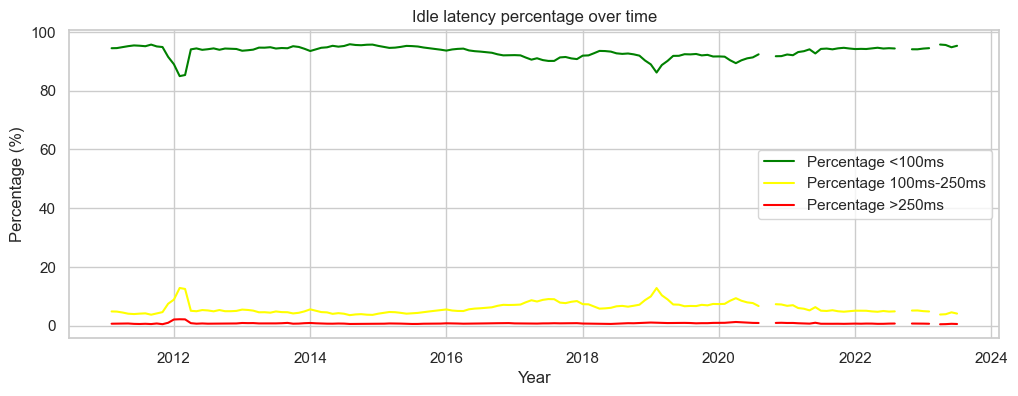

In [3]:
# General plot again
plt.figure(figsize=(12,4))
sns.set_theme(style="whitegrid")

for col, color in [("Percentage <100ms", "green"), ("Percentage 100ms-250ms", "yellow"), ("Percentage >250ms", "red")]:
    x_dates = merge_df["dtime per month"]
    y = merge_df[col]
    plt.plot(x_dates, y, label=f"{col}", color = color)

plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.title(f"Idle latency percentage over time")
plt.legend(loc="best")
plt.show()

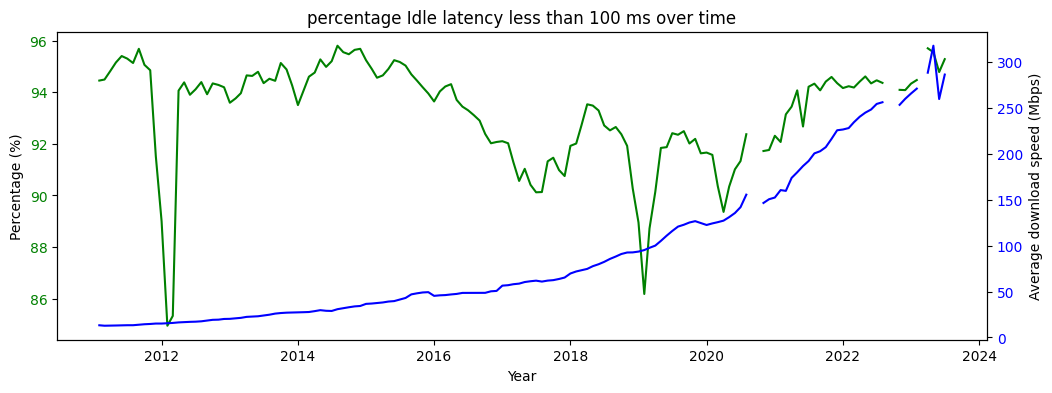

In [15]:
get_pc100(merge_df)

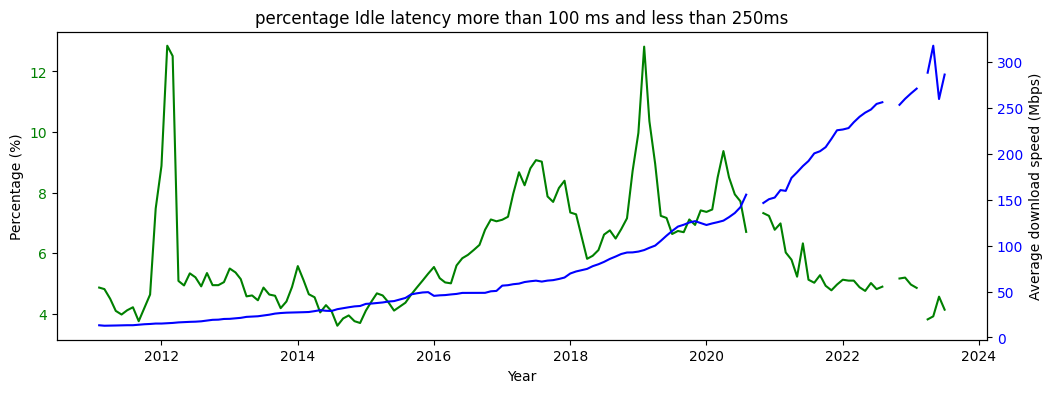

In [16]:
get_pc100_250(merge_df)

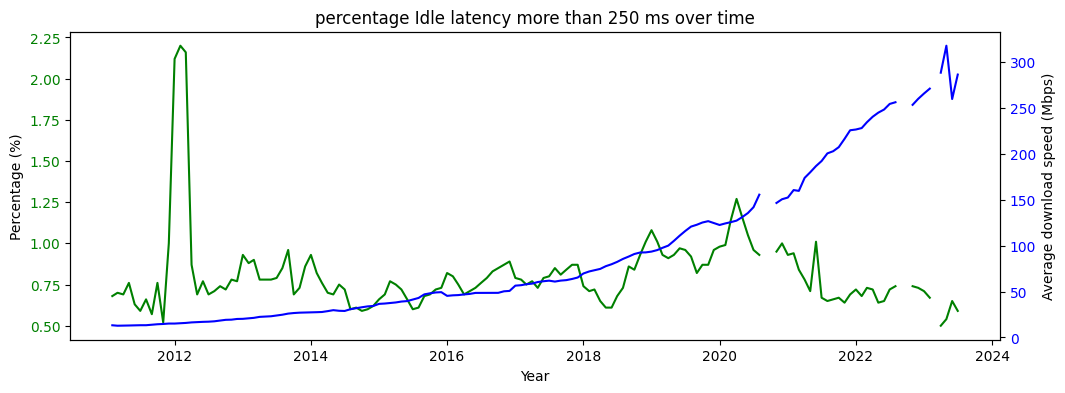

In [17]:
get_pc250(merge_df)

## Downstream LUL (Jan 2011 - Jul 2023)

In [18]:
latency = pd.read_csv("data_rtt_max_monthly/downstream LUL Percentage.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()

,dtime per month,Average speed (Mbps),Percentage <100ms,Percentage 100ms-250ms,Percentage >250ms
146,2023-03-01,NaN,NaN,NaN,NaN
147,2023-04-01,288.538,66.38,20.16,13.46
148,2023-05-01,317.928,68.22,20.37,11.41
149,2023-06-01,259.856,64.09,23.69,12.22
150,2023-07-01,286.494,67.26,21.76,10.98


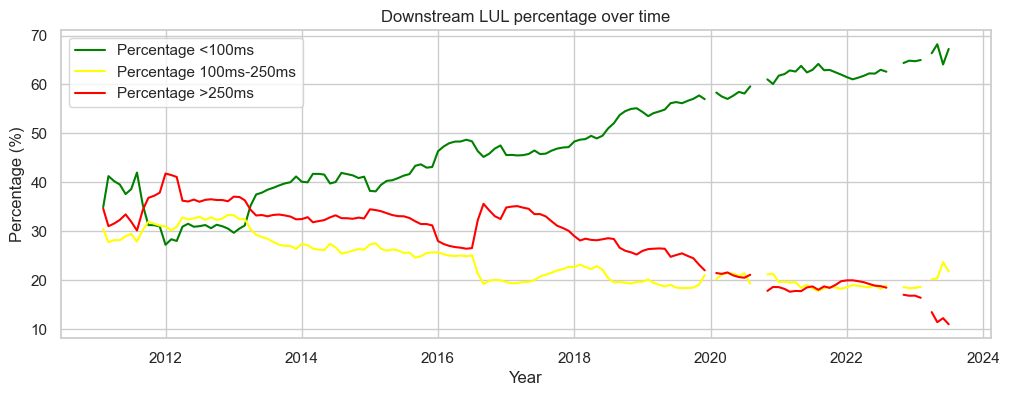

In [5]:
# General plot again
plt.figure(figsize=(12,4))
sns.set_theme(style="whitegrid")

for col, color in [("Percentage <100ms", "green"), ("Percentage 100ms-250ms", "yellow"), ("Percentage >250ms", "red")]:
    x_dates = merge_df["dtime per month"]
    y = merge_df[col]
    plt.plot(x_dates, y, label=f"{col}", color = color)

plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.title(f"Downstream LUL percentage over time")
plt.legend(loc="best")
# And show
plt.show()

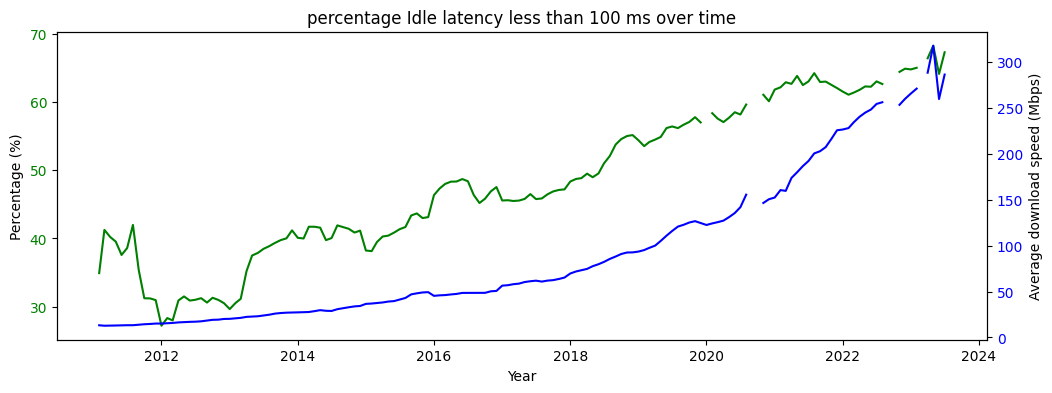

In [19]:
get_pc100(merge_df)

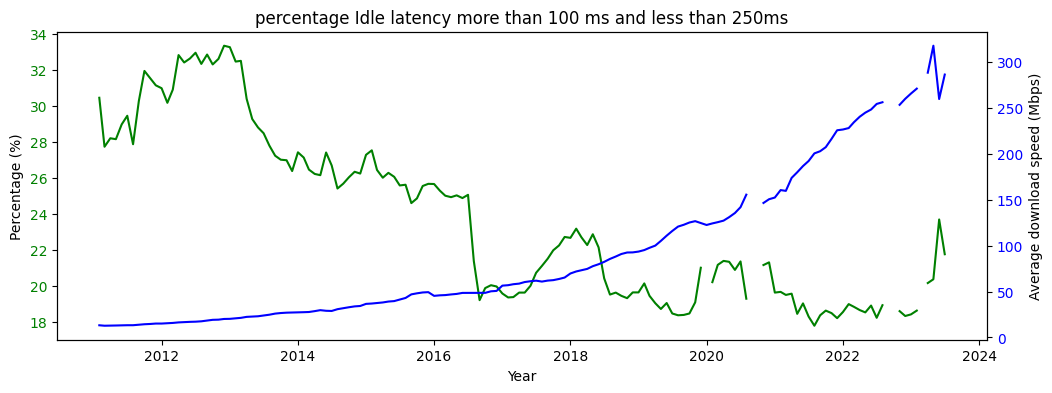

In [20]:
get_pc100_250(merge_df)

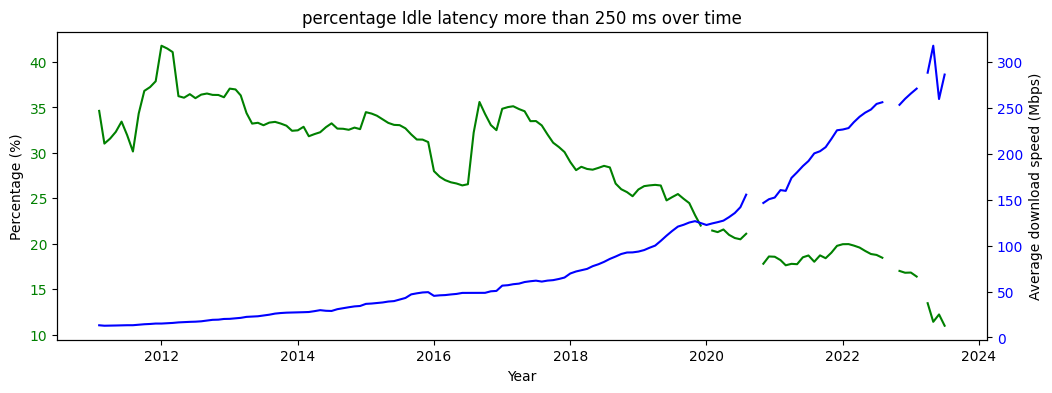

In [21]:
get_pc250(merge_df)

## Upstream LUL (Jan 2011 - Jul 2023)

In [26]:
latency = pd.read_csv("data_rtt_max_monthly/upstream LUL Percentage.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()

,dtime per month,Average speed (Mbps),Percentage <100ms,Percentage 100ms-250ms,Percentage >250ms
146,2023-03-01,NaN,NaN,NaN,NaN
147,2023-04-01,128.806,46.80,29.50,23.70
148,2023-05-01,169.915,49.88,25.85,24.27
149,2023-06-01,127.646,47.67,27.52,24.80
150,2023-07-01,141.151,49.34,27.85,22.81


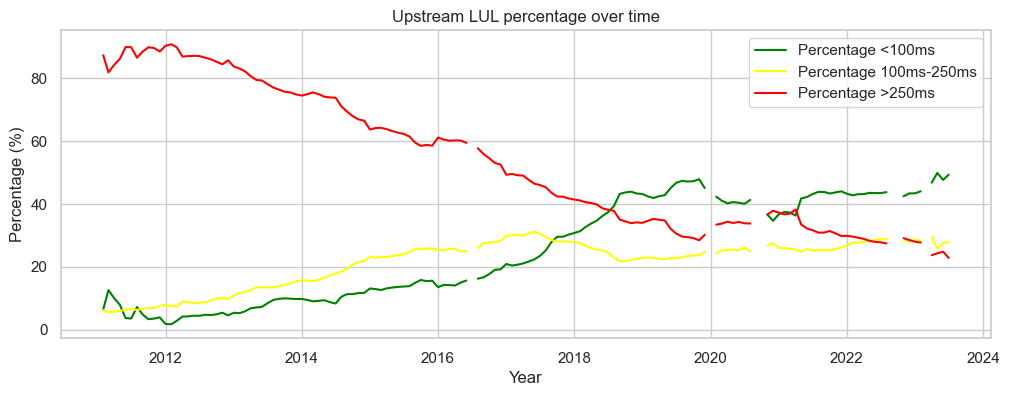

In [7]:
# General plot again
plt.figure(figsize=(12,4))
sns.set_theme(style="whitegrid")

for col, color in [("Percentage <100ms", "green"), ("Percentage 100ms-250ms", "yellow"), ("Percentage >250ms", "red")]:
    x_dates = merge_df["dtime per month"]
    y = merge_df[col]
    plt.plot(x_dates, y, label=f"{col}", color = color)

plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.title(f"Upstream LUL percentage over time")
plt.legend(loc="best")
# And show
plt.show()

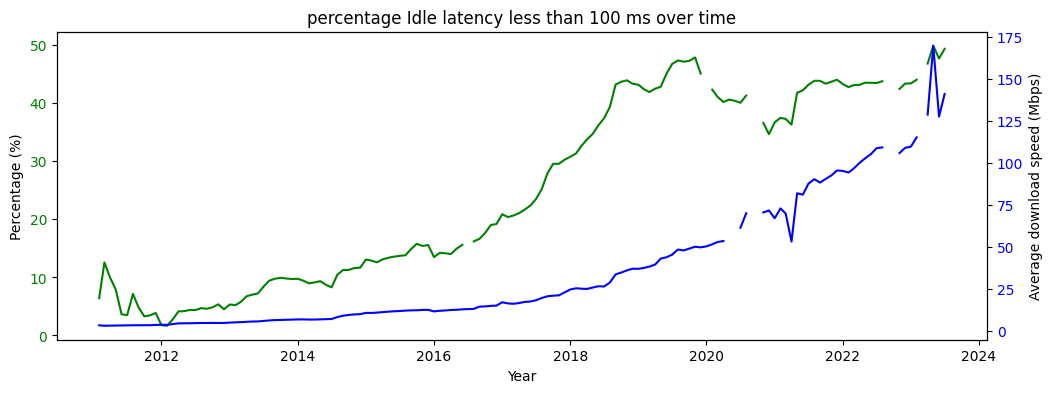

In [27]:
get_pc100(merge_df)

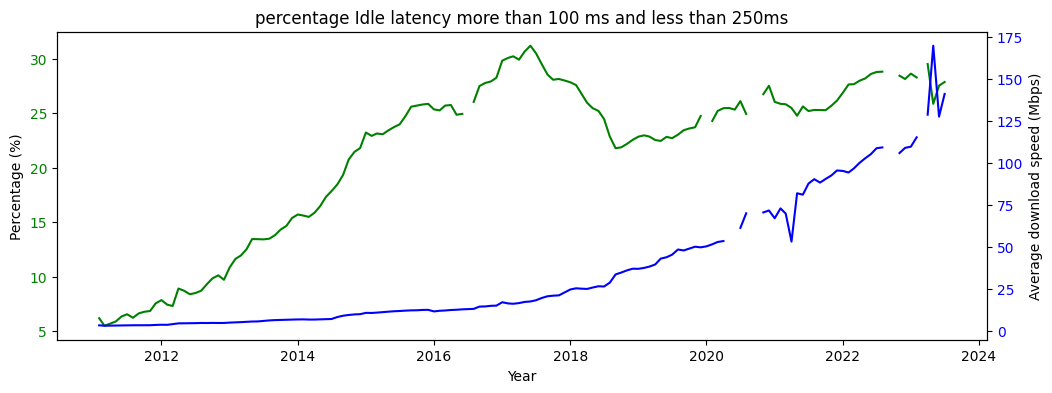

In [28]:
get_pc100_250(merge_df)

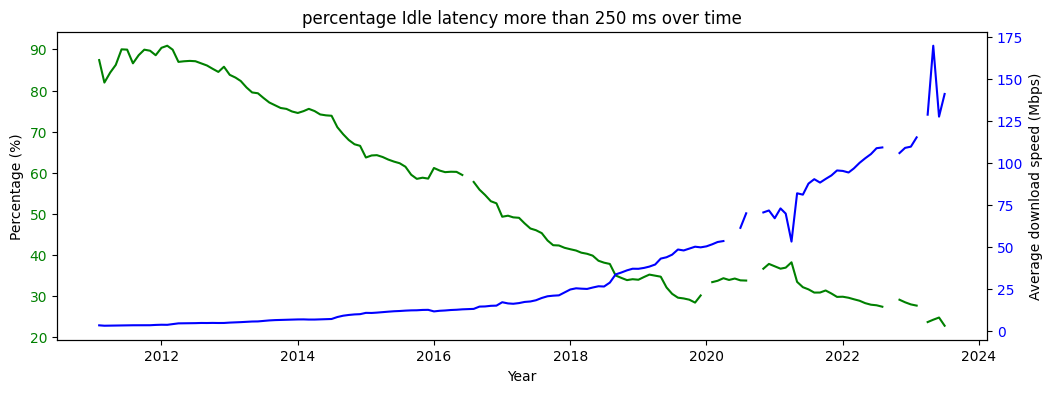

In [29]:
get_pc250(merge_df)